# Interactive mask selection for Target Pixel Files
---

- Author: João Aires (UFRN)

Hi there! Welcome to this code.

This little tutorial will show you how to work with the ```TPF2LC``` class of the ```interactive_TPF_lightcurve_tool.py``` code.

First, make sure that the ```interactive_TPF_lightcurve_tool.py``` is in the same directory as this notebook and also that the following libraries are installed in your python enviroment:

- ```numpy```: for numerical computation;
- ```matplotlib```: for plots;
- ```astropy```: to deal with astronomical quantities and units;
- ```lightkurve```: to download and work Target Pixel Files (TPF) and light curves.

After make sure that all above libraries are intalled, let's start the tutorial.

## 0. Importing libraries
---

Let's start by importing all the important libraries. Make sure that the notebook plotting style is ```%matplotlib QtAgg``` to the interactive part works properly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from interactive_TPF_lightcurve_tool import TPF2LC
%matplotlib QtAgg

Optionally, you can configure the matplotlib plot style. In this tutorial, we will use the following plot style (make sure that you have the ```Calibri``` font installed on your machine; if you are a Windows user, you don't need to worry about this):

In [2]:
def style():
    plt.rc("lines", linewidth=1.0, linestyle="-", color="black")
    plt.rc("font", family="Calibri", weight="light", size=11.0)
    plt.rc(
        "axes",
        edgecolor="black",
        facecolor="white",
        linewidth=.8,
        grid=False,
        titlesize="x-large",
        titleweight='light',
        labelsize="x-large",
        labelweight="light",
        labelcolor="black",
    )
    plt.rc('figure', facecolor='white')
    plt.rc("mathtext", fontset='custom', rm='Calibri')
    plt.rc("axes.formatter", limits=(-4, 4))
    plt.rc(("xtick", "ytick"), labelsize=12, direction="in", color='black')
    plt.rc("xtick", top=True)
    plt.rc("ytick", right=True)
    plt.rc(("xtick.major", "ytick.major"), size=8, pad=6, width=.8)
    plt.rc(("xtick.minor", "ytick.minor"), size=3, pad=6, width=.8, visible=True)
    plt.rc("legend", numpoints=1, fontsize="x-large", shadow=False, frameon=False)

style()

## 1. Download the TPF from a target
---


Now that the required libraries were already imported, we will properly start the tutorial. 

First of all, we need to download the TPF for a target. In this tutorial, we will use long cadence data for ```Kepler-25``` as the interest object. This data will be downloaded using the ```lightkurve``` package as follows.

In [3]:
TPF = lk.search_targetpixelfile('kepler-25', cadence='long')[0].download()
TPF

KeplerTargetPixelFile Object (ID: 4349452)

## 2. Initialize the TPF2LC object
---


Now with the TPF file already downloaded, we will start the ```TPF2LC``` object:

In [4]:
SELECTOR = TPF2LC(TPF)

If you want the information on what you can call from this object, use the ```.help()``` function.

In [5]:
SELECTOR.help()

Name: TPF2LC
Description: Interactively creates a Target Pixel File (TPF) mask and
             produces the corresponding light curve.                 
Author: João Aires (UFRN)                                            
                                                                     
Function                      Return                                 
interact()                    Display the interactive module to select
                              the mask.                              
get_mask()                    Returns the mask created in interact().
get_lightcurve()              Returns the light curve assosciated with
                              the mask selection.                    
get_flatten_lightcurve()      Returns the flattened light curve assos-
                              ciated with the mask selection.        
                                                                     
IMPORTANT: You need to use %matplotlib QtAgg to interaction work.    


It is important to notice that all functions whose name starts with "get_" only returns something different from the default values, if the ```interact()``` function was called earlier, since it is the part where the mask selection occurs and all the others are dependend on this mask.

Therefore, lets start by calling the ```interact()``` function and selecting the pixels in the TPF image that corresponds to the mask.

In [7]:
SELECTOR.interact()

The interactive window that appears is shown in ```Figure-1.png```, where the hashed pixels are the pixels the were selected as my mask. You can create your own mask by running through the pixels, press ```1``` to ```add the pixel``` to mask and ```2``` to ```remove```. When add or remove the pixel of the mask, the light curve displayed are automatically updated.

You can see the boolean mask created by running:

In [8]:
SELECTOR.get_mask()

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False,  True,  True, False, False, False],
       [False, False, False,  True,  True,  True, False, False],
       [False, False,  True,  True,  True,  True, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]])

Where the True values are in the position where the hashed pixels were.

The light curve produced can be obtained by calling the function ```.get_lightcurve()```:

In [16]:
LC = SELECTOR.get_lightcurve()
LC[:5]

time,flux,flux_err
Time,float32,float32
2455093.2246750006,0.983539,3.0507841e-05
2455093.2451079097,0.9836857,3.0510066e-05
2455093.2655407186,0.98358613,3.0508756e-05
2455093.2859734274,0.98374826,3.0512072e-05
2455093.306406336,0.9837243,3.0511741e-05


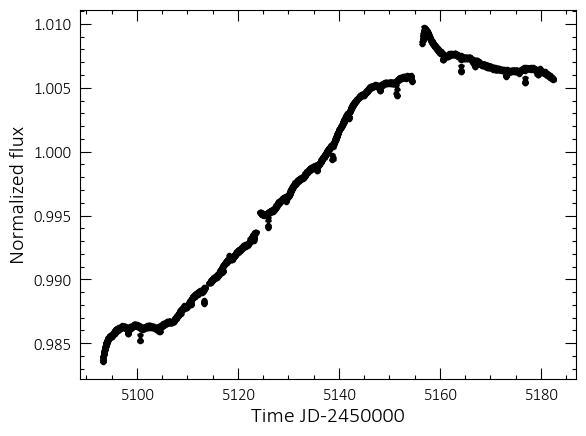

In [14]:
%matplotlib inline
plt.figure()
plt.errorbar(LC['time'].value-2450000, LC['flux'], yerr=LC['flux_err'], ls='', lw=.7, marker='.', capsize=2, color='k')
plt.xlabel('Time JD-2450000')
plt.ylabel('Normalized flux')
plt.show()

Or, if you prefer, the flattened light curve can be obtained by calling the function ```.get_flatten_lightcurve()```:

In [17]:
FLAT_LC = SELECTOR.get_flatten_lightcurve()
FLAT_LC[:5]

time,flux,flux_err
Time,float64,float64
2455093.2246750006,0.9998832937485442,3.101481596189443e-05
2455093.2451079097,0.9999859425794361,3.1015636056916786e-05
2455093.2655407186,0.999838831804447,3.101288029232843e-05
2455093.2859734274,0.9999582556964011,3.101484360130201e-05
2455093.306406336,0.9998891311242558,3.1013118519845796e-05


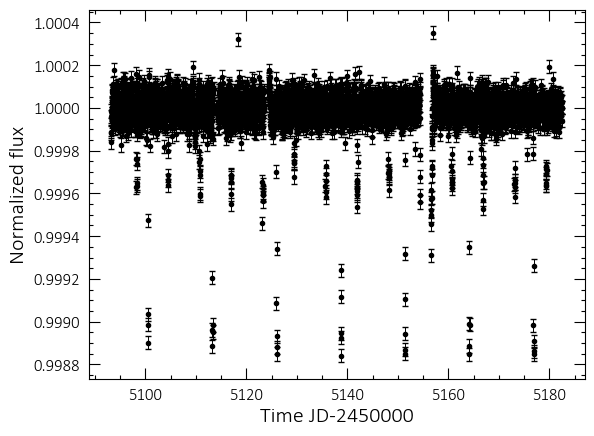

In [18]:
%matplotlib inline
plt.figure()
plt.errorbar(FLAT_LC['time'].value-2450000, FLAT_LC['flux'], yerr=FLAT_LC['flux_err'], ls='', lw=.7, marker='.', capsize=2, color='k')
plt.xlabel('Time JD-2450000')
plt.ylabel('Normalized flux')
plt.show()

That's it, the full functionality of the TPF2LC class. 

Hope you enjoy it!

**João Aires**